##Librerias utilizadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.impute import SimpleImputer
import seaborn as sns

## Preprocesamiento y limpieza de datos

In [ ]:
# Importando los datos
dataset = pd.read_csv('housing.csv')
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
#Cantidad de Datos
num_instances, num_columns = dataset.shape

#Datos
print("Numero de Instancias:", num_instances)
print("Columnas:", num_columns)

Numero de Instancias: 20640
Columnas: 10


In [ ]:
# Tipo de Dato en las columnas
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# Estadistica descriptiva del dataframe
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# se asigna 'X' con el dataset original sin la columna para ver la correlación
# se asigna 'y' a la variable dependiente a predecir
X = dataset.drop(columns=['ocean_proximity'])
y = dataset['ocean_proximity']
X.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [ ]:
# Se encontraron datos nulos, en este caso en la variable 'total_bedrooms'
X.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0


In [ ]:
# Como existen valores nulos, debemos rellenar estos valores
# obteniendo la media con los valores de la misma columna
new_data = SimpleImputer(missing_values = np.nan, strategy='mean')
X['total_bedrooms'] = new_data.fit_transform(X, X['total_bedrooms'])

In [ ]:
X.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [ ]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,-122.23,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,-122.22,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,-122.24,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,-122.25,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,-122.25,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,-121.09,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,-121.21,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,-121.22,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,-121.32,741.0,349.0,1.8672,84700.0


## Gráfico de dispersión de acuerdo a su latitud y longitud

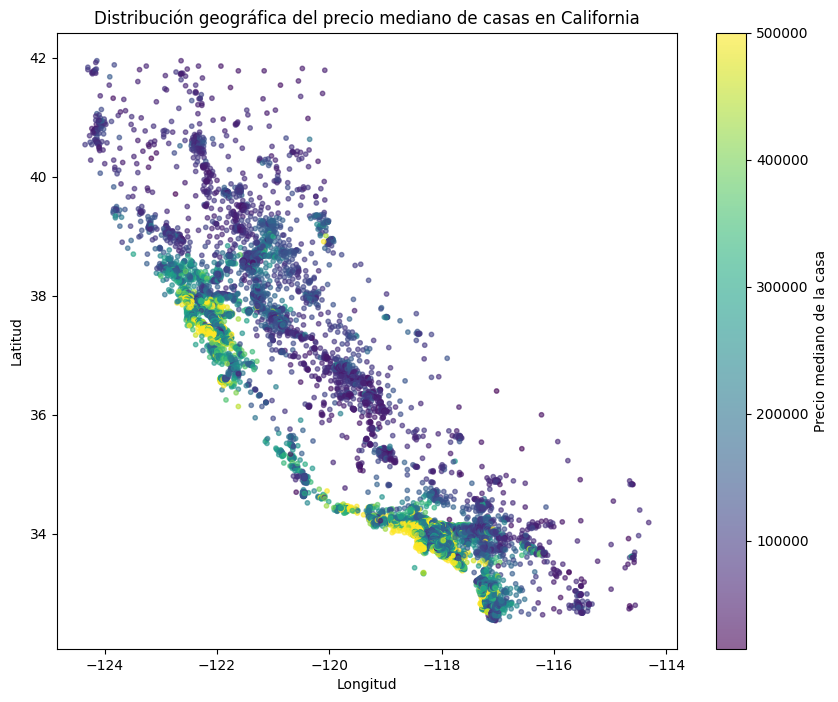

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X['longitude'],
    X['latitude'],
    c=X['median_house_value'],
    cmap='viridis',
    alpha=0.6,
    s=10
)
plt.colorbar(scatter, label='Precio mediano de la casa')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución geográfica del precio mediano de casas en California')
plt.show()

## Matriz de correlación

<Axes: >

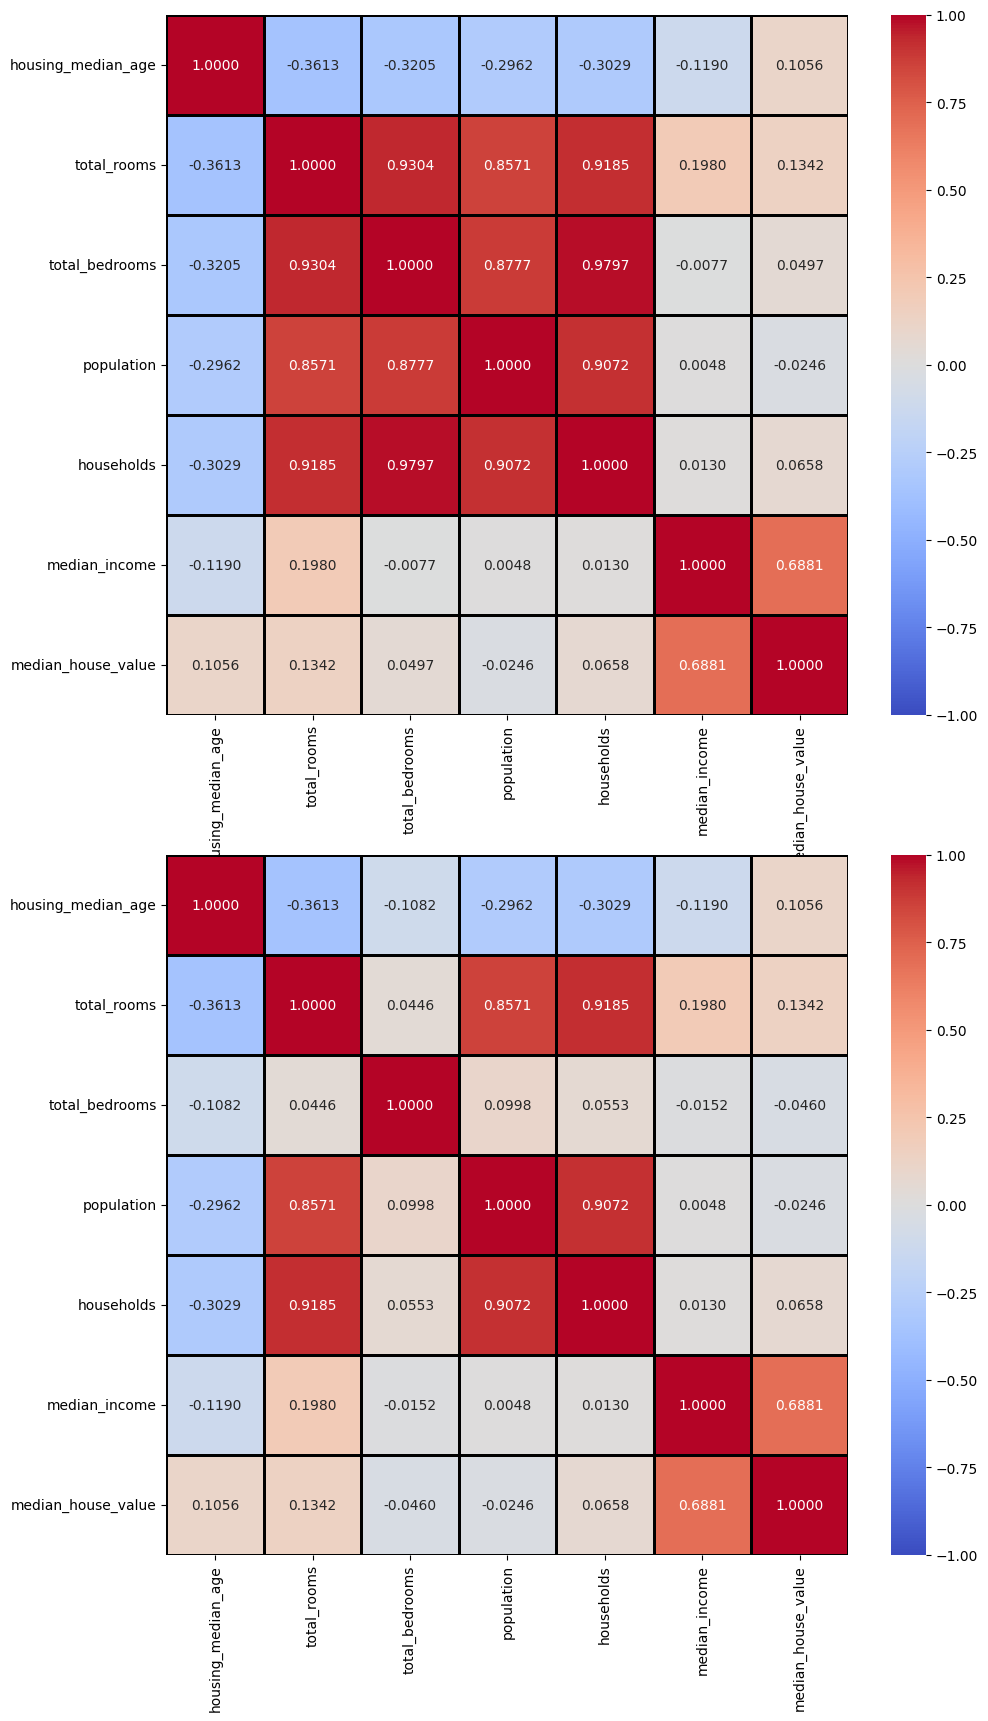

In [ ]:
# Creamos 2 figuras. En 2 renglones colocamos 1 gráfica "(2, 1)"
figure, axis = plt.subplots(2, 1, figsize = (11,20))

# Asignamos a estas variables los dataframes correspondientes sin tomar en cuenta las 2 variables que no son adecuadas para este conjunto de datos
dataset_2 = dataset.drop(columns=['latitude', 'longitude'])
X_2 = X.drop(columns=['latitude', 'longitude'])

# Primer gráfico con el dataframe 'dataset_2' especificado arriba. Recordemos que este tiene valores nulos en 'total_bedrooms'
sns.heatmap(dataset_2.corr(numeric_only=True),
    annot = True,
    cmap= 'coolwarm',
    vmin = -1,
    vmax = 1,
    linewidths = 1,
    linecolor='black',
    fmt = '.4f',
    ax = axis[0]
)

# Segundo gráfico con el dataframe 'X_2' especificado arriba.
sns.heatmap(X_2.corr(),
    annot = True,
    vmin = -1,
    vmax = 1,
    linewidths = 1,
    cmap= 'coolwarm',
    linecolor='black',
    fmt = '.4f',
    ax = axis[1]
)

Se puede notar que los datos nulos en la variable ***'total_bedrooms'*** afectan en gran proporción a la correlación con las otras variables, dando asi a un análisis poco realista.
Se evidencia una alta correlación entre la población y la cantidad de casas en el barrio exactamente del '0.9072'. tambien una alta relación entre la población y cantidad de habitaciones en la vivienda y a su vez con la cantidad de casas y la cantidad de habitaciones.

In [ ]:
# Se asigna dataset_3 al dataframe original para realizar el one hot encoding y adicionalmente rellenar los datos faltantes
# para mostrar datos mucho más certeros.
dataset_3 = dataset
# Se hace la estrategia one hot encoding (Dummy variables) para categorizar las características no numéricas.
dataset_3_dummy = pd.get_dummies(dataset_3)
# Se realiza el relleno de valores faltantes en 'dataset_3'
new_data2 = SimpleImputer(missing_values = np.nan, strategy='mean')
dataset_3_dummy['total_bedrooms'] = new_data2.fit_transform(dataset_3_dummy, dataset_3_dummy['total_bedrooms'])
dataset_3_dummy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,-122.23,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,-122.22,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,-122.24,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,-122.25,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,-122.25,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,-121.09,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,-121.21,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,-121.22,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,-121.32,741.0,349.0,1.8672,84700.0,False,True,False,False,False


## Se realiza el gráfico de dispersión para cada una de las variables categóricas.
Se tomaron las 2 características 'population' & 'households' ya que tiene una correlación alta que es del "0.9072"

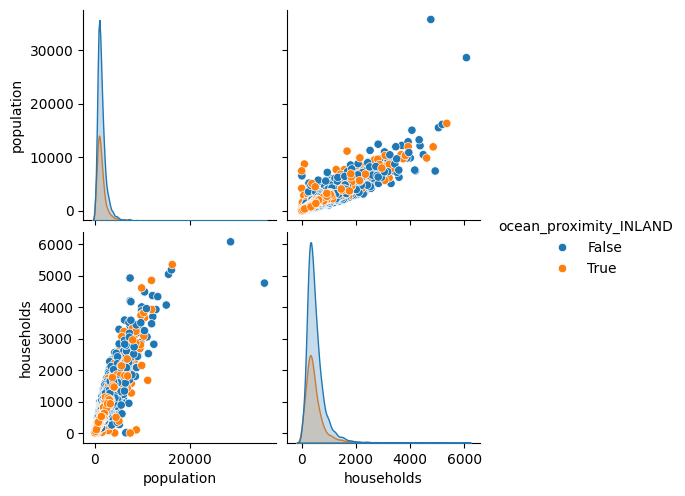

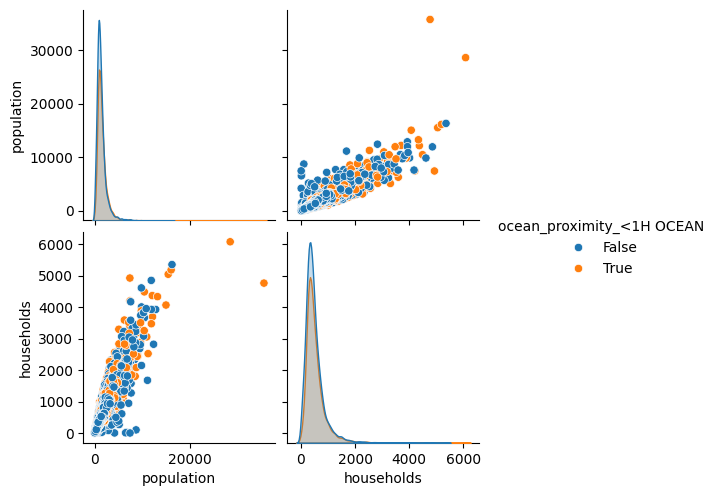

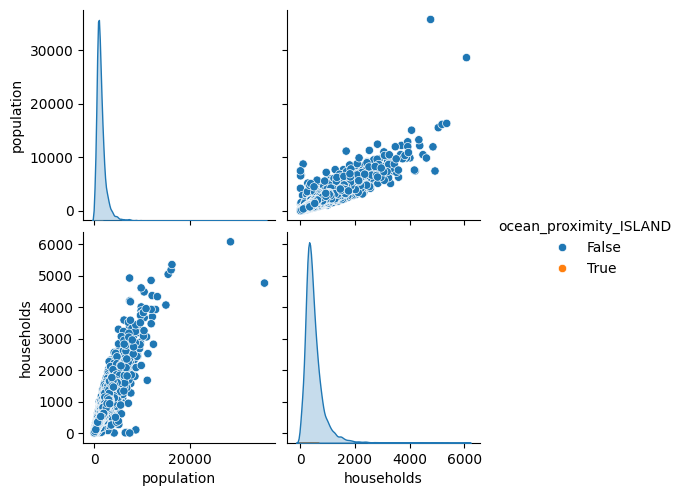

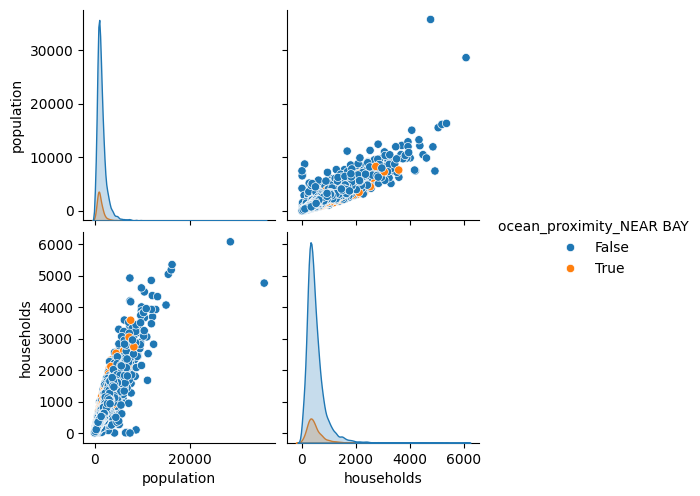

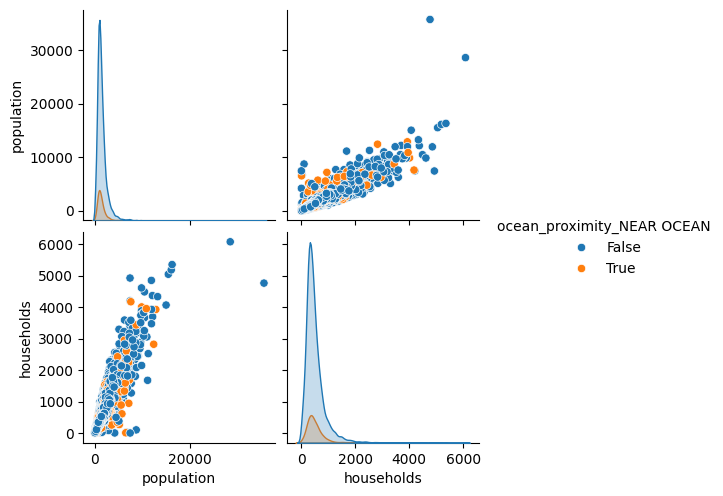

In [ ]:
sns.pairplot(
    dataset_3_dummy,
    hue = 'ocean_proximity_INLAND',
    vars = ['population', 'households'],
)

sns.pairplot(
    dataset_3_dummy,
    hue = 'ocean_proximity_<1H OCEAN',
    vars = ['population', 'households'],
)

sns.pairplot(
    dataset_3_dummy,
    hue = 'ocean_proximity_ISLAND',
    vars = ['population', 'households'],
)

sns.pairplot(
    dataset_3_dummy,
    hue = 'ocean_proximity_NEAR BAY',
    vars = ['population', 'households'],
)

sns.pairplot(
    dataset_3_dummy,
    hue = 'ocean_proximity_NEAR OCEAN',
    vars = ['population', 'households'],
)

<Axes: xlabel='median_house_value', ylabel='Count'>

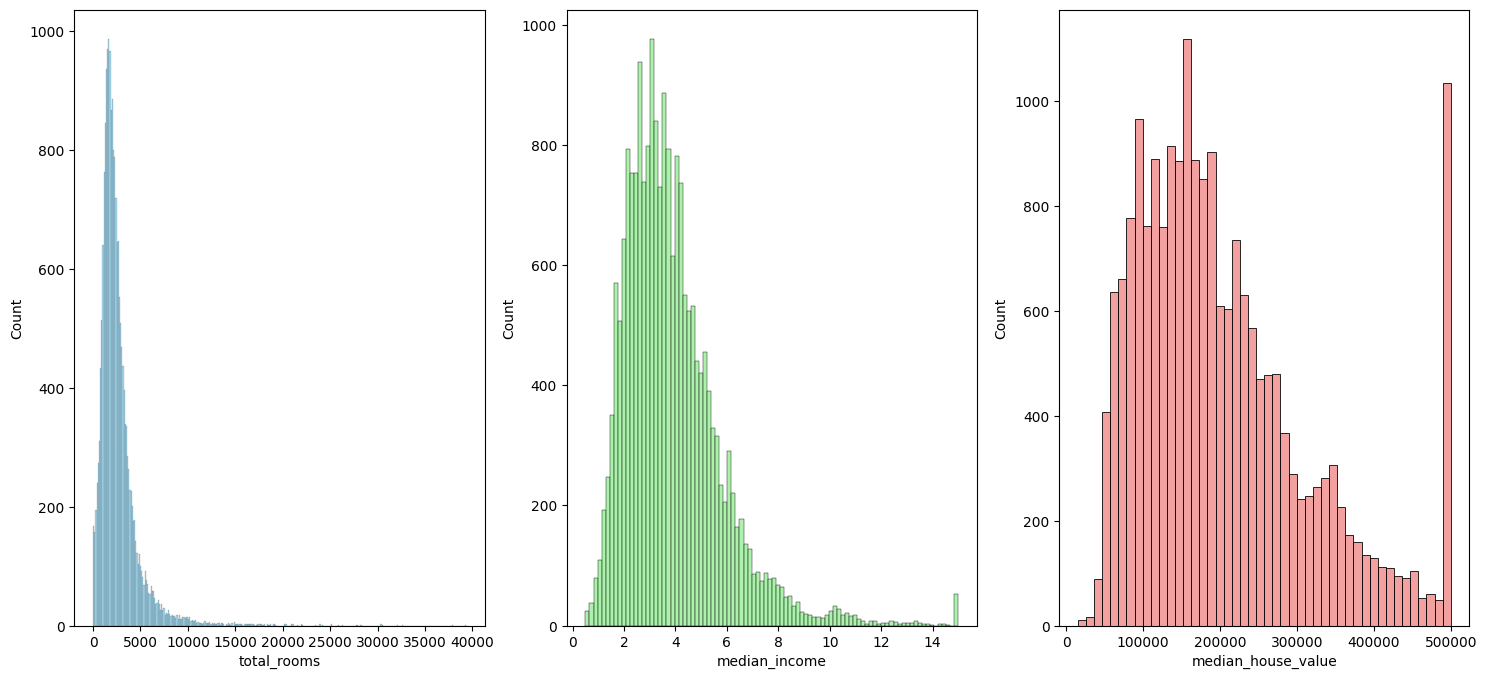

In [ ]:
figure2, axis_2 = plt.subplots(1, 3, figsize = (18, 8))
sns.histplot(data = X, x = 'total_rooms', ax = axis_2[0], color = 'skyblue')
sns.histplot(data = X, x = 'median_income', ax = axis_2[1], color = 'lightgreen')
sns.histplot(data = X, x = 'median_house_value', ax = axis_2[2], color = 'lightcoral')

Se puede ver ciertos valores muy desviados del valores normales, lo que indicaria posibles valores atípicos en el conjunto de datos

<Axes: ylabel='median_house_value'>

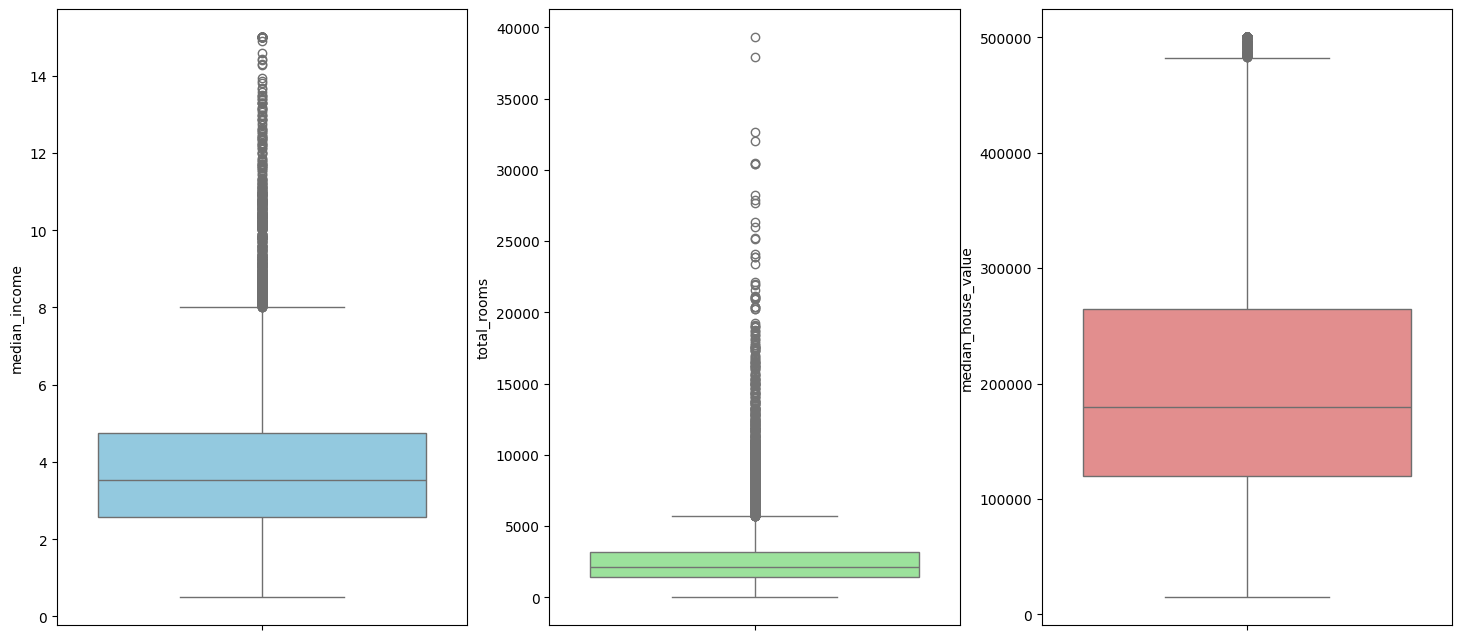

In [ ]:
figure3, axis_3 = plt.subplots(1, 3, figsize = (18, 8))
sns.boxplot(X_2, y = 'median_income', ax = axis_3[0], color = 'skyblue')
sns.boxplot(X_2, y = 'total_rooms', ax = axis_3[1], color = 'lightgreen')
sns.boxplot(X_2, y = 'median_house_value', ax = axis_3[2], color = 'lightcoral')

En este diagrama caja se observa de mejor manera la distribución de estas caracteristicas y se encuentran más detallados en la cantidad de valores atípicos

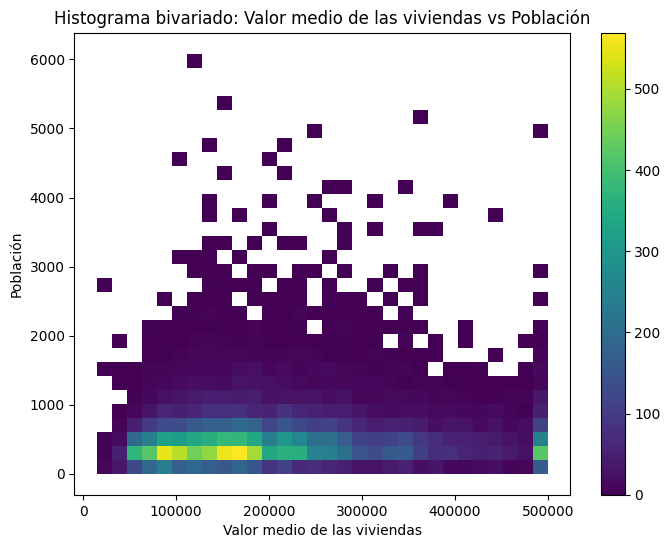

In [ ]:
plt.figure(figsize=(8, 6))

sns.histplot(
    data=X_2,
    x='median_house_value',
    y='households',
    bins = 30,
    cbar = True,
    cmap='viridis'
)

plt.title('Histograma bivariado: Valor medio de las viviendas vs Población')
plt.xlabel('Valor medio de las viviendas')
plt.ylabel('Población')

plt.show()

En este histograma se muestra la relación del valor medio de las viviendas y la población , en donde se encuentra un rango entre 85,000$ - 165,000 dólares con un color amarillo muy saturado.